# Eigenvectors & Eigenvalues

- Eigenvector $v$
- Eigenvalue $\lambda$

$Av=\lambda v$

$Av$ has same direction as $v$.

- $A$ must be square
- $v$ must be non-zero vector
- $\lambda$ must be non-zero
- more than one $v$ can have the same $\lambda$
- one $v$ cannot have more than one $\lambda$

## Numpy

`np.linalg.eig(A)` returns a tuple of:
- vector of eigenvalues
- matrix of eigenvectors

In [1]:
import numpy as np

In [2]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [3]:
lambdas, V = np.linalg.eig(A)

In [4]:
V # each column separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [5]:
lambdas # each vector element separate eigenvalue lambda

array([ 1.37228132, -4.37228132])

Show that $Av=\lambda v$ for first Eigenvector and Eigenvalue.

In [6]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [7]:
lam = lambdas[0]
lam

1.3722813232690143

In [8]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [9]:
lam*v

array([1.18031462, 0.70000958])

In [10]:
Av == lam*v

array([ True,  True])

In [11]:
import matplotlib.pyplot as plt

def plot_vectors(vectors, colors):
  # based on Hadrien Jean's plotVectors() under MIT license
  """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
  """
  plt.figure()
  plt.axvline(x=0, color="lightgray")
  plt.axhline(y=0, color="lightgray")

  for i in range(len(vectors)):
    x = np.concatenate([[0,0], vectors[i]])
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                angles="xy", scale_units="xy", scale=1, color=colors[i])

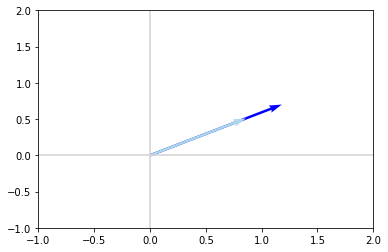

In [12]:
plot_vectors([Av, v], ["blue", "lightblue"])
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

## PyTorch

`torch.linalg.eig(A_torch)` returns a tuple of:
- vector of eigenvalues
- matrix of eigenvectors
- complex numbers because real matrices can have complex eigenvectors

In [13]:
import torch

In [14]:
A_torch = torch.tensor([[-1,4], [2,-2.]]) # must be floats for PyTorch eig()
A_torch

tensor([[-1.,  4.],
        [ 2., -2.]])

In [15]:
# gives complex numbers because real matrices can have complex eigenvectors
lambdas_torch, V_torch = torch.linalg.eig(A_torch)

In [16]:
V_torch

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [17]:
V_torch_real = V_torch.float() # discard complex part because zero here
V_torch_real

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /pytorch/aten/src/ATen/native/Copy.cpp:240.)
  """Entry point for launching an IPython kernel.


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [18]:
lambdas_torch # also gives complex numbers

tensor([ 1.3723+0.j, -4.3723+0.j])

In [19]:
lambdas_torch_real = lambdas_torch.float() # discard complex parts because zero here
lambdas_torch_real

tensor([ 1.3723, -4.3723])

Show that $Av=\lambda v$ for second Eigenvector and Eigenvalue.

In [20]:
v_torch = V_torch_real[:,1]
v_torch

tensor([-0.7645,  0.6446])

In [21]:
lam_torch = lambdas_torch_real[1]
lam_torch

tensor(-4.3723)

In [22]:
Av_torch = torch.matmul(A_torch, v_torch)
Av_torch

tensor([ 3.3428, -2.8182])

In [23]:
lam_torch*v_torch

tensor([ 3.3428, -2.8182])

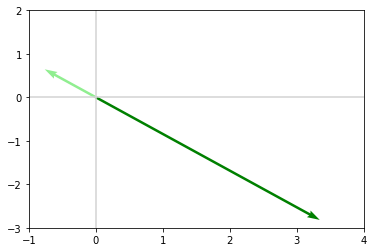

In [24]:
plot_vectors([Av_torch.numpy(), v_torch.numpy()], ["green", "lightgreen"])
plt.xlim(-1,4)
plt.ylim(-3,2)
plt.show()

## TensorFlow 

`tf.linalg.eig(A_torch)` returns a tuple of:
- vector of eigenvalues
- matrix of eigenvectors
- also returns complex values like PyTorch

In [25]:
import tensorflow as tf

In [26]:
A_tf = tf.Variable([[25, 2, 9], [5, 26, -5], [3, 7, -1.]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2.,  9.],
       [ 5., 26., -5.],
       [ 3.,  7., -1.]], dtype=float32)>

In [27]:
lambdas_tf, V_tf = tf.linalg.eig(A_tf) # also gives complex values

In [28]:
V_tf

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ 0.34220472+0.j, -0.65019226+0.j,  0.71175736+0.j],
       [-0.23789713+0.j,  0.74464047+0.j,  0.6665213 +0.j],
       [-0.9090109 +0.j,  0.15086628+0.j,  0.2217    +0.j]],
      dtype=complex64)>

In [29]:
lambdas_tf

<tf.Tensor: shape=(3,), dtype=complex64, numpy=array([-0.2974063+0.j, 20.621176 +0.j, 29.676228 +0.j], dtype=complex64)>

Show that $Av=\lambda v$ for third Eigenvector and Eigenvalue.

In [30]:
V_tf_real = tf.cast(V_tf, dtype=tf.float32)
V_tf_real

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.34220472, -0.65019226,  0.71175736],
       [-0.23789713,  0.74464047,  0.6665213 ],
       [-0.9090109 ,  0.15086628,  0.2217    ]], dtype=float32)>

In [31]:
lambdas_tf_real = tf.cast(lambdas_tf, dtype=tf.float32)
lambdas_tf_real

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.2974063, 20.621176 , 29.676228 ], dtype=float32)>

In [32]:
v_tf = V_tf_real[:,2]
v_tf

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.71175736, 0.6665213 , 0.2217    ], dtype=float32)>

In [33]:
lam_tf = lambdas_tf_real[2]
lam_tf

<tf.Tensor: shape=(), dtype=float32, numpy=29.676228>

In [34]:
Av_tf = tf.linalg.matvec(A_tf, v_tf)
Av_tf

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([21.122276 , 19.77984  ,  6.5792212], dtype=float32)>

In [35]:
lam_tf * v_tf

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([21.122274, 19.779839,  6.57922 ], dtype=float32)>